In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
X = df.iloc[:,0:20]
y = df.iloc[:, -1]

In [8]:
# chai 2 formula

# r^2 = E (o-e)/e

# r^2= chi square
# E = epsilon
# o = observerd value
# e = expected

In [30]:
#  score_func = determine score through chi methord, k no of feature determine
best_feature = SelectKBest(score_func=chi2, k=10)

In [31]:
fit = best_feature.fit(X,y)
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [18]:
#  determine score
dfscore = pd.DataFrame(fit.scores_)

In [19]:
#  taking columns Name
dfcolumns = pd.DataFrame(X.columns)

In [27]:
#  higher the score the more important is feature
feature_score = pd.concat([dfcolumns,dfscore], axis=1 )
feature_score.columns = ['Features', 'score' ]# Naming header
feature_score.nlargest(10, 'score') # determine to 10

,Features,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Feature Importance

predict the score of each features using ExtraTreeClassifier

In [57]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier


In [37]:
df = pd.read_csv('train.csv')

In [38]:
X = df.iloc[:, 0:20]
y = df.iloc[:, -1]

In [39]:
clf = ExtraTreesClassifier()

In [42]:
model = clf.fit(X,y)

In [43]:
model.feature_importances_

array([0.05645319, 0.021457  , 0.0379844 , 0.01861663, 0.03620292,
       0.01864512, 0.03876834, 0.03357819, 0.0369955 , 0.03584474,
       0.03791351, 0.04700459, 0.05235896, 0.36076586, 0.035244  ,
       0.03810775, 0.03501201, 0.01424537, 0.02335279, 0.02144914])

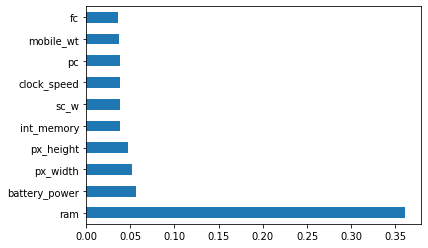

In [58]:
#  plot bargraph
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind = 'barh')


# Correlation Metrix with heatmap 

In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [96]:
df = pd.read_csv('train.csv')

In [97]:
X = df.iloc[:,1:20]
y = df.iloc[:,-1]

In [105]:
corrmat = df.corr()

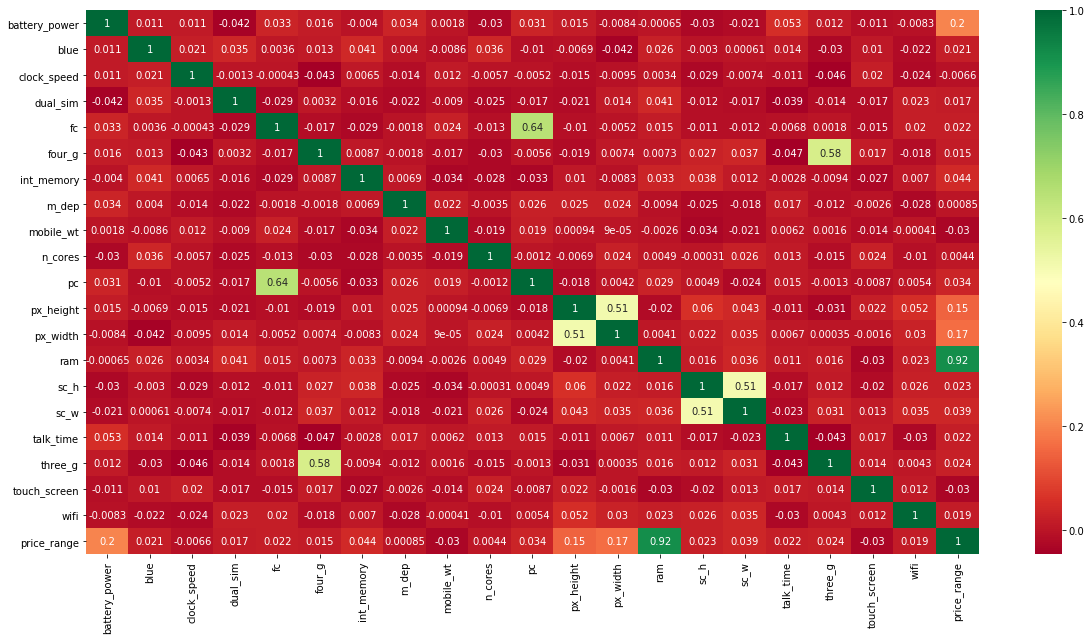

In [99]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat, annot = True, cmap = 'RdYlGn')